In [1]:
import analysis.indicator as indicator
import analysis.candle as candle
import data.getData as getData
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
symbol = 'ETH/USDT'
timeframe = '15m'

In [3]:
df = getData.get_historical_data(symbol,timeframe)
df['SMA_100'] = indicator.analysis_sma(df['close'],100)
df['EMA_50'] = indicator.analysis_ema(df['close'],50)
print(df)

                        open     high      low    close     volume    SMA_100   
timestamp                                                                       
2023-04-19 22:15:00  1984.97  1984.97  1967.84  1978.26    972.611        NaN  \
2023-04-19 22:30:00  1978.66  1979.15  1967.84  1979.10    680.771        NaN   
2023-04-19 22:45:00  1972.00  1983.61  1970.50  1979.32   1144.312        NaN   
2023-04-19 23:00:00  1979.32  1981.82  1953.29  1960.00   8392.008        NaN   
2023-04-19 23:15:00  1960.00  1977.00  1907.94  1970.00  16585.728        NaN   
...                      ...      ...      ...      ...        ...        ...   
2023-04-25 02:00:00  1844.30  1845.43  1844.18  1844.20    381.551  1858.1334   
2023-04-25 02:15:00  1844.18  1846.38  1844.18  1846.38    435.638  1857.8361   
2023-04-25 02:30:00  1846.38  1846.38  1840.15  1840.15   4326.450  1857.4796   
2023-04-25 02:45:00  1840.15  1844.18  1837.56  1844.00    585.174  1857.1987   
2023-04-25 03:00:00  1844.00

In [4]:
macd, signal, histogram = indicator.analysis_macd(df['close'])
print(f"${macd}")

$timestamp
2023-04-19 22:15:00         NaN
2023-04-19 22:30:00         NaN
2023-04-19 22:45:00         NaN
2023-04-19 23:00:00         NaN
2023-04-19 23:15:00         NaN
                         ...   
2023-04-25 02:00:00   -0.081170
2023-04-25 02:15:00   -0.099936
2023-04-25 02:30:00   -0.610480
2023-04-25 02:45:00   -0.696399
2023-04-25 03:00:00   -0.741419
Length: 500, dtype: float64


In [5]:
engulfing = candle.analysis_engulfing(df['open'],df['high'],df['low'],df['close'])
print(engulfing)

timestamp
2023-04-19 22:15:00      0
2023-04-19 22:30:00      0
2023-04-19 22:45:00      0
2023-04-19 23:00:00      0
2023-04-19 23:15:00      0
                      ... 
2023-04-25 02:00:00      0
2023-04-25 02:15:00    100
2023-04-25 02:30:00      0
2023-04-25 02:45:00      0
2023-04-25 03:00:00      0
Length: 500, dtype: int32


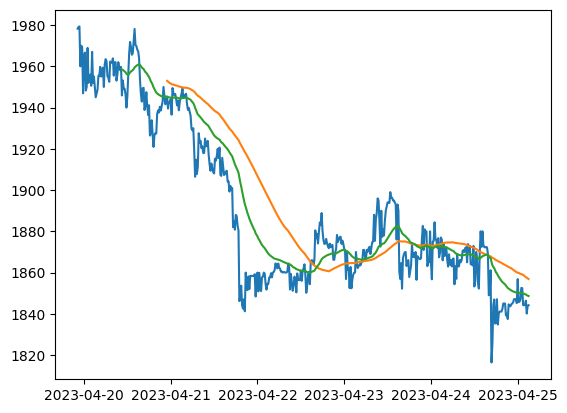

In [6]:
plt.plot(df['close'])
plt.plot(df['SMA_100'])
plt.plot(df['EMA_50'])


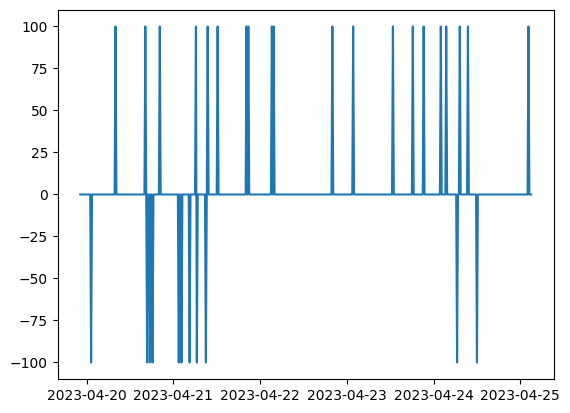

In [7]:
plt.plot(engulfing)

In [8]:
df['RSI'] = indicator.analysis_rsi(df['close'])

In [9]:
macd, signal, histogram = indicator.analysis_macd(df['close'])
c = ['red' if cl < 0 else "green" for cl in histogram]

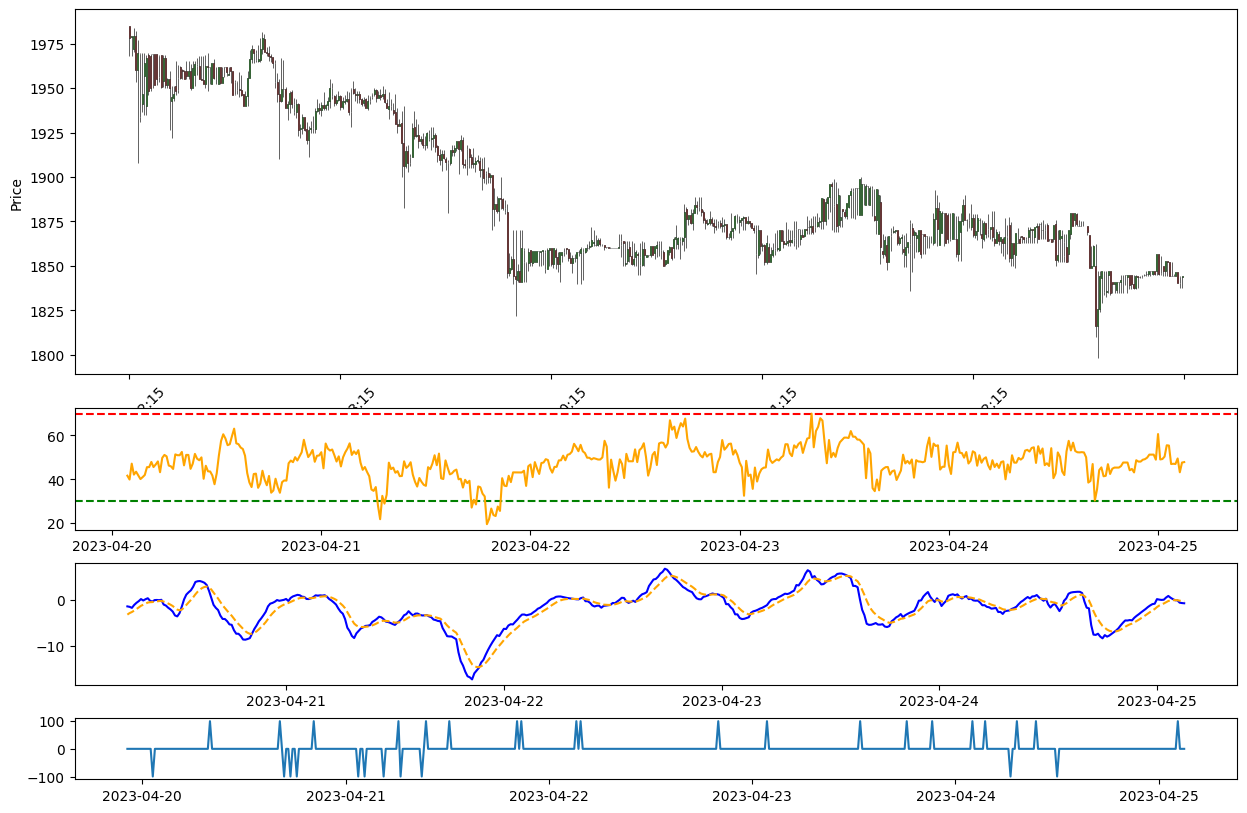

In [10]:
fig, axs = plt.subplots(4,1,gridspec_kw={"height_ratios":[6,2,2,1]},figsize=(15,10))
colors = mpf.make_marketcolors(up="#00ff00",down="#ff0000")
mpf_style = mpf.make_mpf_style(marketcolors=colors)
mpf.plot(df, type="candle", ax=axs[0],style=mpf_style)
# axs[0].plot(df['SMA_100'])
# axs[0].plot(df['EMA_50'])
axs[3].plot(engulfing)
axs[1].axhline(y=70,color='r',linestyle='--')
axs[1].axhline(y=30,color='g',linestyle='--')
axs[1].plot(df["RSI"], color= "orange")
axs[2].plot(macd,'b-')
axs[2].plot(signal,'--', color="orange")
# axs[2].bar(histogram.index, histogram, color=c)